In [1]:
import pandas            as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn           as sns
import numpy             as np
from tqdm import tqdm

In [2]:
df = pd.read_csv('C:/Users/tuf/Downloads/analyst_test_transactions_db.csv')

Робота з даними
припустимо, у липні провели спеціальну акцію, спрямовану на поліпшення ретеншену. Новим користувачам надсилали листа з купоном. Чи спрацювала акція?
зробити можна на пітоні в юпітер або екселе або в гугл шиті, навіть можете в SQL зробити, як зручніше.
назад потрібно дати файл із формулами чи кодом та опис того, як вийшов результат поетапно.

In [3]:
df

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984
...,...,...,...,...,...
76852,36921,163682.0,2015-01-15,2015-03-28,1095
76853,31360,145146.0,2015-01-04,2015-08-09,547
76854,56195,8929.0,2012-09-18,2015-11-12,850
76855,46362,78673.0,2015-02-20,2015-07-21,356


те що ти подивишся наприклад середнє по виручки до червня і після то потрібно розуміти що хлопці могли витратитися на продукт але потім піти у відкат

In [4]:
df.dtypes

user_id               int64
order_id            float64
reg_date             object
transaction_date     object
revenue               int64
dtype: object

In [5]:
df.isna().mean()

user_id             0.0
order_id            0.0
reg_date            0.0
transaction_date    0.0
revenue             0.0
dtype: float64

In [6]:
df['reg_date']         = pd.to_datetime(df.reg_date, format = '%Y-%m-%d')
df['transaction_date'] = pd.to_datetime(df.transaction_date, format = '%Y-%m-%d')
#перекладаємо у формат часу

In [17]:
df.dtypes

user_id                      int64
order_id                   float64
reg_date            datetime64[ns]
transaction_date    datetime64[ns]
revenue                      int64
dtype: object

In [11]:
df.describe()

,user_id,order_id,revenue
count,76857.000000,76857.000000,76857.000000
mean,50112.561120,99950.627984,1000.587559
std,20051.576685,53283.741305,248.729287
min,-37599.000000,-138325.000000,-146.000000
25%,36575.000000,62909.000000,832.000000
50%,50145.000000,100145.000000,1001.000000
75%,63716.000000,136997.000000,1168.000000
max,138987.000000,305790.000000,2069.000000


<Axes: >

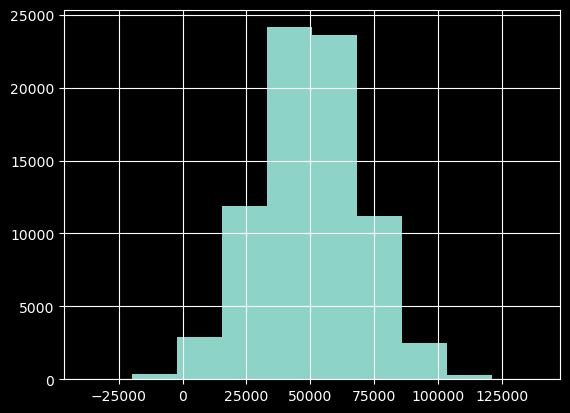

In [285]:
#дивимося на розподілення. Воно - нормальне. Можемо припустити, що воно є штучно згенерований.
df.user_id.hist()

<Axes: >

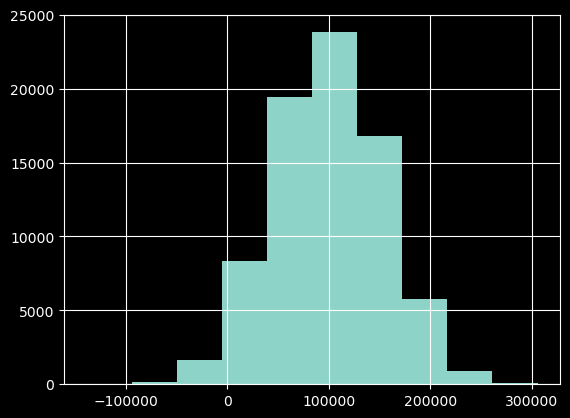

In [286]:
#дивимося на розподілення. Воно - нормальне. Можемо припустити, що воно є штучно згенерований.
df.order_id.hist()

<Axes: >

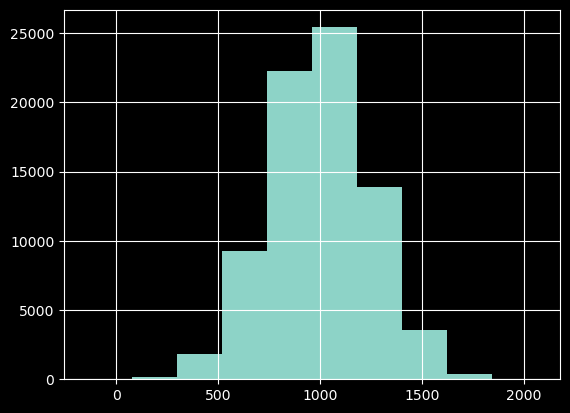

In [288]:
#дивимося на розподілення. Воно - нормальне. Можемо припустити, що воно є штучно згенерований.
df.revenue.hist()

In [9]:
df.head()

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984


In [14]:
df['reg_month'] = df.reg_date.apply(lambda x : x.replace(day=1)) #змінюємо дату реєстрації на початок місяця

In [17]:
df.drop(columns = 'transaction_month',inplace = True )

In [18]:
df

,user_id,order_id,reg_date,transaction_date,revenue,reg_month
0,57562,94545.0,2013-12-22,2015-07-16,1088,2013-12-01
1,40047,81824.0,2013-11-24,2015-01-19,1027,2013-11-01
2,48153,144851.0,2015-07-03,2015-10-29,601,2015-07-01
3,54591,116111.0,2013-07-12,2015-04-30,881,2013-07-01
4,39789,134943.0,2013-05-25,2015-07-21,984,2013-05-01
...,...,...,...,...,...,...
76852,36921,163682.0,2015-01-15,2015-03-28,1095,2015-01-01
76853,31360,145146.0,2015-01-04,2015-08-09,547,2015-01-01
76854,56195,8929.0,2012-09-18,2015-11-12,850,2012-09-01
76855,46362,78673.0,2015-02-20,2015-07-21,356,2015-02-01


In [26]:
users = df.groupby('user_id',as_index = False).agg({'reg_month':min})
#створюємо таблицю першу з групованими користувачами та мінімальною датою реєстрації 

In [27]:
users.user_id.value_counts()

user_id
-37599     1
 60664     1
 60652     1
 60653     1
 60654     1
          ..
 39736     1
 39738     1
 39740     1
 39741     1
 138987    1
Name: count, Length: 48214, dtype: int64

In [28]:
users

,user_id,reg_month
0,-37599,2015-01-01
1,-32239,2015-11-01
2,-29822,2015-07-01
3,-29531,2014-09-01
4,-25337,2015-04-01
...,...,...
48209,128964,2015-10-01
48210,130617,2015-02-01
48211,131071,2012-04-01
48212,132484,2015-06-01


In [46]:
minimum_date = df.transaction_date.min()

In [50]:
maximum_date = df.transaction_date.max()

In [56]:
months = pd.DataFrame(pd.date_range(minimum_date, maximum_date, freq = 'MS')) #- MS - month start 
#робимо окрему таблицю з унікальними місяцями для того, щоб зробити кросджоін і на кожного користувача був кожен місяць року

In [58]:
months['key'] = 1

In [109]:
months = months.rename(columns={0:'trans_month'})

In [110]:
users['key'] = 1 

In [111]:
users

,user_id,reg_month,key
0,-37599,2015-01-01,1
1,-32239,2015-11-01,1
2,-29822,2015-07-01,1
3,-29531,2014-09-01,1
4,-25337,2015-04-01,1
...,...,...,...
48209,128964,2015-10-01,1
48210,130617,2015-02-01,1
48211,131071,2012-04-01,1
48212,132484,2015-06-01,1


In [112]:
months

,month,key
0,2015-01-01,1
1,2015-02-01,1
2,2015-03-01,1
3,2015-04-01,1
4,2015-05-01,1
5,2015-06-01,1
6,2015-07-01,1
7,2015-08-01,1
8,2015-09-01,1
9,2015-10-01,1


In [113]:
months.merge(users)

,month,key,user_id,reg_month
0,2015-01-01,1,-37599,2015-01-01
1,2015-01-01,1,-32239,2015-11-01
2,2015-01-01,1,-29822,2015-07-01
3,2015-01-01,1,-29531,2014-09-01
4,2015-01-01,1,-25337,2015-04-01
...,...,...,...,...
530349,2015-11-01,1,128964,2015-10-01
530350,2015-11-01,1,130617,2015-02-01
530351,2015-11-01,1,131071,2012-04-01
530352,2015-11-01,1,132484,2015-06-01


In [116]:
template.query('user_id==-32239')

,month,key,user_id,reg_month
1,2015-01-01,1,-32239,2015-11-01
48215,2015-02-01,1,-32239,2015-11-01
96429,2015-03-01,1,-32239,2015-11-01
144643,2015-04-01,1,-32239,2015-11-01
192857,2015-05-01,1,-32239,2015-11-01
241071,2015-06-01,1,-32239,2015-11-01
289285,2015-07-01,1,-32239,2015-11-01
337499,2015-08-01,1,-32239,2015-11-01
385713,2015-09-01,1,-32239,2015-11-01
433927,2015-10-01,1,-32239,2015-11-01


In [118]:
template = template[template['month'] >= template['reg_month']]
#залишимо тільки тих користувачів, які були вже зареєстровані

In [142]:
df['month'] = df.transaction_date.apply(lambda x : x.replace(day=1))

In [143]:
t =  df.groupby(['user_id','month'])['revenue'].sum().reset_index()

In [144]:
t

,user_id,month,revenue
0,-37599,2015-03-01,1182
1,-32239,2015-11-01,727
2,-29822,2015-09-01,908
3,-29531,2015-06-01,1462
4,-25337,2015-07-01,899
...,...,...,...
73027,128964,2015-10-01,1049
73028,130617,2015-06-01,1295
73029,131071,2015-10-01,856
73030,132484,2015-08-01,747


In [148]:
report = template.merge(t,how= 'left',on = ['user_id','month'])

In [146]:
len(template)

467625

In [153]:
report['active'] = (report.revenue > 0) * 1

In [154]:
report

,month,key,user_id,reg_month,revenue,active
0,2015-01-01,1,-37599,2015-01-01,NaN,0
1,2015-01-01,1,-29531,2014-09-01,NaN,0
2,2015-01-01,1,-25282,2014-09-01,1107.0,1
3,2015-01-01,1,-24665,2014-09-01,NaN,0
4,2015-01-01,1,-23778,2014-12-01,NaN,0
...,...,...,...,...,...,...
467620,2015-11-01,1,128964,2015-10-01,NaN,0
467621,2015-11-01,1,130617,2015-02-01,NaN,0
467622,2015-11-01,1,131071,2012-04-01,NaN,0
467623,2015-11-01,1,132484,2015-06-01,NaN,0


In [168]:
retention = report.pivot_table(index = 'reg_month', columns = 'month',values = 'active', aggfunc = (np.mean))

<Axes: xlabel='month', ylabel='reg_month'>

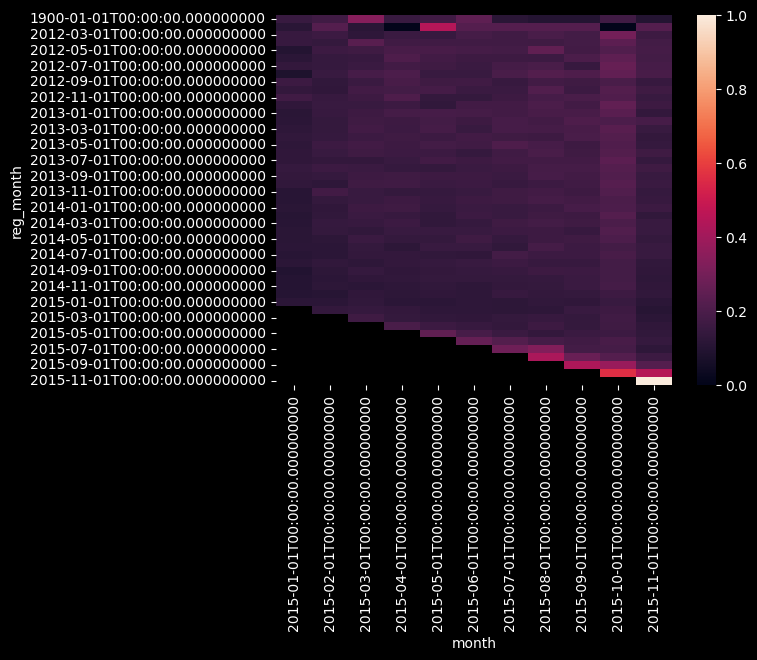

In [160]:
sns.heatmap(retention)
# ми бачимо прибуток саме після 7 місяця.Можу припустити, що це було саме через поліпшення компанії

In [170]:
report['lifetime'] = ((report['month'] - report['reg_month'])/np.timedelta64(1, 'M')).round().astype(int)

In [171]:
report

,month,key,user_id,reg_month,revenue,active,lifetime
0,2015-01-01,1,-37599,2015-01-01,NaN,0,0
1,2015-01-01,1,-29531,2014-09-01,NaN,0,4
2,2015-01-01,1,-25282,2014-09-01,1107.0,1,4
3,2015-01-01,1,-24665,2014-09-01,NaN,0,4
4,2015-01-01,1,-23778,2014-12-01,NaN,0,1
...,...,...,...,...,...,...,...
467620,2015-11-01,1,128964,2015-10-01,NaN,0,1
467621,2015-11-01,1,130617,2015-02-01,NaN,0,9
467622,2015-11-01,1,131071,2012-04-01,NaN,0,42
467623,2015-11-01,1,132484,2015-06-01,NaN,0,5


In [174]:
report.pivot_table(index = 'reg_month', columns = 'month',values = 'active', aggfunc = (np.mean))
#Середнє в нас є, як відсоток користувачів 'count' виступив би як загальна кількість, а 'sum' як кількість активних."

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,0.150943,0.169811,0.339623,0.150943,0.169811,0.245283,0.113208,0.094340,0.094340,0.169811,0.094340
2012-02-01,0.111111,0.222222,0.111111,0.000000,0.444444,0.222222,0.222222,0.222222,0.222222,0.000000,0.222222
2012-03-01,0.146814,0.157895,0.124654,0.152355,0.146814,0.182825,0.168975,0.193906,0.177285,0.293629,0.160665
2012-04-01,0.146341,0.138211,0.230352,0.168022,0.168022,0.170732,0.170732,0.165312,0.176152,0.241192,0.178862
2012-05-01,0.097315,0.157718,0.167785,0.187919,0.187919,0.181208,0.177852,0.248322,0.174497,0.211409,0.181208
2012-06-01,0.116972,0.142202,0.146789,0.206422,0.172018,0.160550,0.162844,0.158257,0.197248,0.243119,0.176606
2012-07-01,0.136490,0.142061,0.153203,0.175487,0.167131,0.153203,0.181058,0.192201,0.147632,0.261838,0.186630
2012-08-01,0.079545,0.151515,0.185606,0.200758,0.151515,0.151515,0.193182,0.215909,0.204545,0.250000,0.189394
2012-09-01,0.156522,0.130435,0.153623,0.191304,0.165217,0.171014,0.144928,0.173913,0.165217,0.194203,0.144928


In [241]:
retention = report[report['reg_month'] >= '2015-01-01'].pivot_table(index='reg_month',columns='lifetime',values='active',aggfunc='mean')

<Axes: xlabel='lifetime', ylabel='reg_month'>

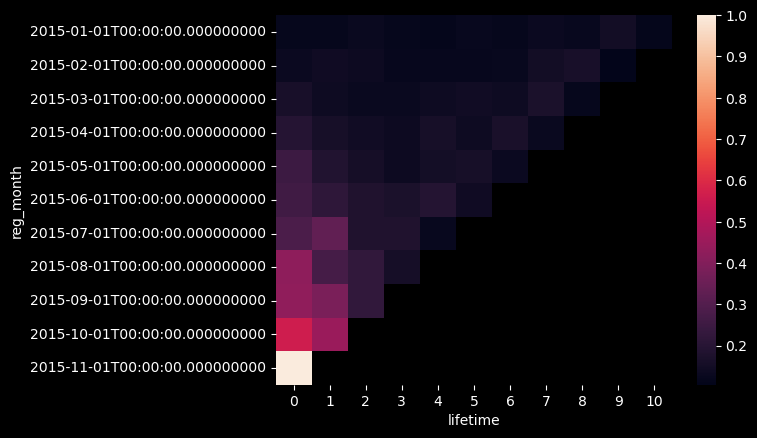

In [186]:
sns.heatmap(retention)

In [244]:
retention

lifetime,0,1,2,3,4,5,6,7,8,9,10
reg_month,,,,,,,,,,,
2015-01-01,0.116928,0.116056,0.129581,0.116492,0.115183,0.124782,0.118237,0.131326,0.126091,0.148778,0.114311
2015-02-01,0.132856,0.141543,0.135922,0.121615,0.122126,0.119571,0.123659,0.149208,0.163005,0.105263,NaN
2015-03-01,0.164114,0.138403,0.129650,0.127462,0.138403,0.145514,0.138950,0.170678,0.117068,NaN,NaN
2015-04-01,0.193627,0.158088,0.144608,0.136029,0.161152,0.137255,0.167892,0.127451,NaN,NaN,NaN
2015-05-01,0.246457,0.184252,0.154331,0.136220,0.152756,0.159055,0.132283,NaN,NaN,NaN,NaN
2015-06-01,0.257924,0.216283,0.180236,0.168428,0.189559,0.141703,NaN,NaN,NaN,NaN,NaN
2015-07-01,0.283110,0.331367,0.179088,0.181769,0.124397,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,0.423358,0.268613,0.222628,0.157664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,0.429314,0.381497,0.221414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


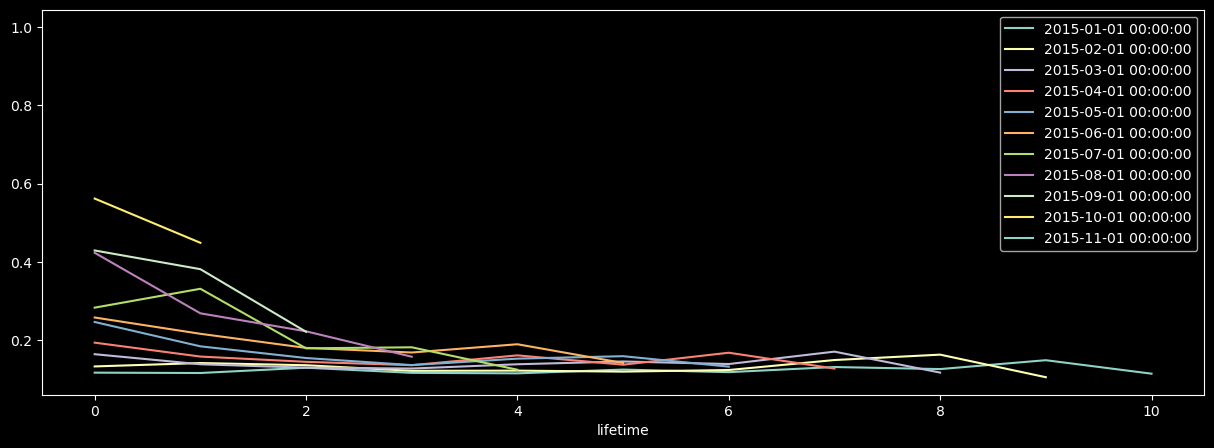

In [283]:
plt.figure(figsize = (15,5))
retention.loc['2015-01-01'].plot()
retention.loc['2015-02-01'].plot()
retention.loc['2015-03-01'].plot()
retention.loc['2015-04-01'].plot()
retention.loc['2015-05-01'].plot()
retention.loc['2015-06-01'].plot()
retention.loc['2015-07-01'].plot()
retention.loc['2015-08-01'].plot()
retention.loc['2015-09-01'].plot()
retention.loc['2015-10-01'].plot()
retention.loc['2015-11-01'].plot()

#Таким чином, ми можемо подивитися на Retention шляхом 'line-plot'.
plt.legend()





З цього можна зробити висновок, що утримання клієнтів стало трохи більшим, якщо взяти сьомий місяць нашого року, але далі утримання клієнтів спадає до минулого рівня. Поліпшення компанії, на мою думку, спровокувало саме велику кількість нових людей. З точки зору утримання, треба подивитися ще декілька місяців, оскільки останній місяць має дуже гарний показник утримання